# Task 1: Genre Classification (Essentia Descriptors)

<a href="https://colab.research.google.com/github/inspektral/asmc-genre-classification/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [16]:
def load_arff(file):
    data, meta = arff.loadarff(file)
    df = pd.DataFrame(data)
    for col in df.select_dtypes([object]).columns:
        df[col] = df[col].str.decode('utf-8')
    return df

def encode_labels(df):
    for col in df.select_dtypes([object]).columns:
        df[col] = df[col].astype('category').cat.codes
    return df

test = encode_labels(load_arff('data/GenreTest.arff'))
train = encode_labels(load_arff('data/GenreTrain.arff'))

In [17]:
def normalize_feature_set(features):
    scaler = StandardScaler()

    scaler.fit(features)
    scaled_features = scaler.transform(features)

    scaled_df = pd.DataFrame(scaled_features)

    return scaled_df

X_test = test.drop('genre', axis=1)
X_test = normalize_feature_set(X_test)
y_test = test['genre']

X_train = train.drop('genre', axis=1)
X_train = normalize_feature_set(X_train)
y_train = train['genre']

display(X_train)

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.216811,0.363643,0.029557,0.100770,-0.594675,0.864132,-0.407978,0.026470,-0.193748,-0.513938,...,-1.375558,-0.248597,1.122673,-1.508505,0.515421,0.139190,-0.012202,1.532084,0.513883,-0.220770
1,-0.362175,0.363643,1.343195,0.100770,-0.594675,0.864132,-0.346270,-0.013361,-0.165483,-0.438054,...,-0.619300,-0.127119,0.483502,-0.911593,0.367463,-0.530001,0.183843,-0.652706,-0.135597,-0.673504
2,-0.627291,0.363643,-1.284081,-1.313551,1.681592,-1.157230,4.257457,5.773305,3.964668,1.615218,...,-0.997430,-0.190042,1.389265,-0.506408,1.201522,-1.469083,2.120907,-0.652706,-1.019196,0.899430
3,-0.182560,0.363643,1.343195,0.100770,-0.594675,0.864132,-0.303757,0.071010,-0.209253,-0.501037,...,-0.997430,0.215663,0.607753,1.421064,0.815173,-0.613816,0.864821,-0.652706,0.066369,-0.417248
4,0.601297,0.363643,1.343195,0.807932,-0.594675,-1.157230,-0.328310,-1.074436,0.356202,-0.734821,...,-0.619300,-0.297600,1.282228,-0.715438,-0.077309,0.277744,-0.636109,-0.652706,0.902236,-0.918126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.428916,0.363643,-1.284081,0.807932,-0.594675,-1.157230,0.566909,-0.180619,0.626721,0.070731,...,-0.619300,-0.348907,0.304961,0.761092,-0.735579,-0.237840,-0.093153,-0.652706,1.300853,0.041479
796,-0.070201,0.363643,1.343195,0.807932,-0.594675,0.864132,-0.103731,-0.581560,0.125779,-0.307130,...,-0.997430,-0.274792,0.085139,-0.087848,-1.389935,1.198596,-1.209558,-0.652706,0.485447,-0.282942
797,-1.043502,0.363643,-1.284081,0.100770,-0.594675,-1.157230,-0.152085,-0.971440,0.303695,-0.308082,...,-0.241171,-0.387498,-1.469882,-0.976758,-0.702868,0.168031,0.003254,-0.652706,-0.625236,-1.077079
798,-0.219746,0.363643,-1.284081,0.807932,-0.594675,-1.157230,-0.121092,-1.065210,0.280249,-0.696681,...,-0.619300,-0.315729,1.187244,-0.798130,-0.402944,0.376384,-0.754020,-0.652706,0.405833,-0.531353


In [18]:
selector = SelectKBest(f_classif, k=30)
selector.fit(X_train, y_train)

X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

/home/inspektral/miniconda3/envs/mir/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 98 100] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/inspektral/miniconda3/envs/mir/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred)
print(f'MLP Classifier accuracy: {mlp_accuracy}')

MLP Classifier accuracy: 0.9948186528497409


In [20]:
k_values = range(1, 21)
best_accuracy = 0
best_k = 1

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, predictions)

print(f'kNN Accuracy: {knn_accuracy} with k={best_k}')

kNN Accuracy: 1.0 with k=1


In [21]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)
print(f'SVM accuracy: {svm_accuracy}')

SVM accuracy: 0.8808290155440415


In [22]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest: {rf_accuracy}')

Random Forest: 0.9792746113989638


In [23]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, predictions)
print(lr_accuracy)

0.7979274611398963


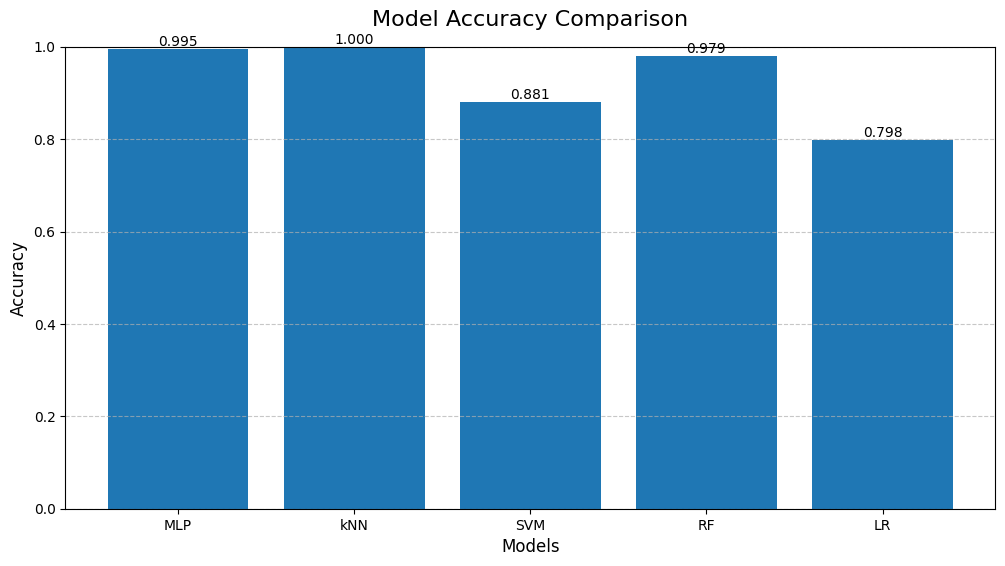

In [24]:
plt.figure(figsize=(12, 6))
accuracies = [mlp_accuracy, knn_accuracy, svm_accuracy, rf_accuracy, lr_accuracy]
models = ['MLP', 'kNN', 'SVM', 'RF', 'LR']

bars = plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison', fontsize=16, pad=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.show()